⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡

In [ ]:
!pip install squarify
import squarify 
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import KFold
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.stats.api import het_breuschpagan
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Начальная обработка данных. Стационаризация. Построение регрессии.**

In [ ]:
!wget -O data https://docs.google.com/spreadsheets/d/e/2PACX-1vQqOIoIeEyjC6tnnKbx_pQAyJxlZl0mIpkR907VHaWkiKq2L7rj0vBKsm2yV7RczRCq3Kyn1v45ol2H/pub?output=xlsx

--2023-03-29 18:23:59--  https://docs.google.com/spreadsheets/d/e/2PACX-1vQqOIoIeEyjC6tnnKbx_pQAyJxlZl0mIpkR907VHaWkiKq2L7rj0vBKsm2yV7RczRCq3Kyn1v45ol2H/pub?output=xlsx
Resolving docs.google.com (docs.google.com)... 142.251.2.101, 142.251.2.102, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-04-4g-sheets.googleusercontent.com/pub/r6backulg5lnalo18mkmp7tf28/37dh3oghqev4q8nalb0k6cik3o/1680114240000/111497783160790842651/*/e@2PACX-1vQqOIoIeEyjC6tnnKbx_pQAyJxlZl0mIpkR907VHaWkiKq2L7rj0vBKsm2yV7RczRCq3Kyn1v45ol2H?output=xlsx [following]
--2023-03-29 18:24:00--  https://doc-04-4g-sheets.googleusercontent.com/pub/r6backulg5lnalo18mkmp7tf28/37dh3oghqev4q8nalb0k6cik3o/1680114240000/111497783160790842651/*/e@2PACX-1vQqOIoIeEyjC6tnnKbx_pQAyJxlZl0mIpkR907VHaWkiKq2L7rj0vBKsm2yV7RczRCq3Kyn1v45ol2H?output=xlsx
Resolving doc-04-4g-sheets.googleusercontent.com (doc-04

In [ ]:
dates = pd.read_excel('data', header=1)
dates = dates.iloc[:, 0]

Признаковое множество изначально представляет собой следующий датасет

In [ ]:
df = pd.read_excel('data', header=1)
df = df.iloc[:,1:]
df.head()

,"SPY(S&P 500 etf adj close), target",PCEPI PCE chain type,UMCSENT CONSUMER CONFIDENCE INDEX,IGREA Index of Global Real Economic Activity,INDPRO Industrial Production: Total Index,USALOLITONOSTSAM CLI,BOPGSTB Trade Balance,DSPIC96 Real Disposable Personal Income,Real Government Consumption Expenditures (GCEC1),Corporate Profits with Inventory (IVA),...,REAINTRATREARAT1YE 1-Year Interest Rate,U.S. Recession Probabilities (RECPROUSM156N),Wilshire 5000 Price Index,CE16OV Employment Level,FRBKCLMCILA KC Fed Labor Market Conditions,CIVPART Labor Force Participation Rate,CSUSHPISA_PC1 U.S. National Home Price Index,PERMIT New Privately-Owned Housing Units,HPIPONM226S Purchase Only House Price Index,USPHCI COINCIDENT ECONOMIC ACTIVITY INDEX FOR THE US
0,74.88906,79.926,90.7,-47.534556,88.5362,99.234234,-32501,9966.6,2857.336,852.492,...,0.855512,2.06,10284.68,136438,0.12468,66.8,6.6,1787,156.61,88.38
1,77.15961,80.144,95.7,-37.273577,89.2097,99.432307,-31161,9973.3,2857.336,852.492,...,1.080396,0.72,10800.00,136177,0.16302,66.6,6.8,1691,157.62,88.43
2,72.88053,80.479,93.0,-36.438491,89.6389,99.514325,-33965,10007.2,2879.282,883.237,...,0.532161,0.36,10500.87,136126,0.20552,66.7,7.1,1669,158.44,88.41
3,72.44807,80.531,96.9,-40.559391,90.0271,99.462649,-34026,10047.9,2879.282,883.237,...,0.108221,0.28,10232.53,136539,0.12515,66.7,7.6,1716,159.53,88.55
4,66.86682,80.632,92.4,-44.201254,90.7645,99.285019,-34732,10078.5,2879.282,883.237,...,0.444130,0.28,9606.97,136415,0.10626,66.6,8.0,1758,160.55,88.64


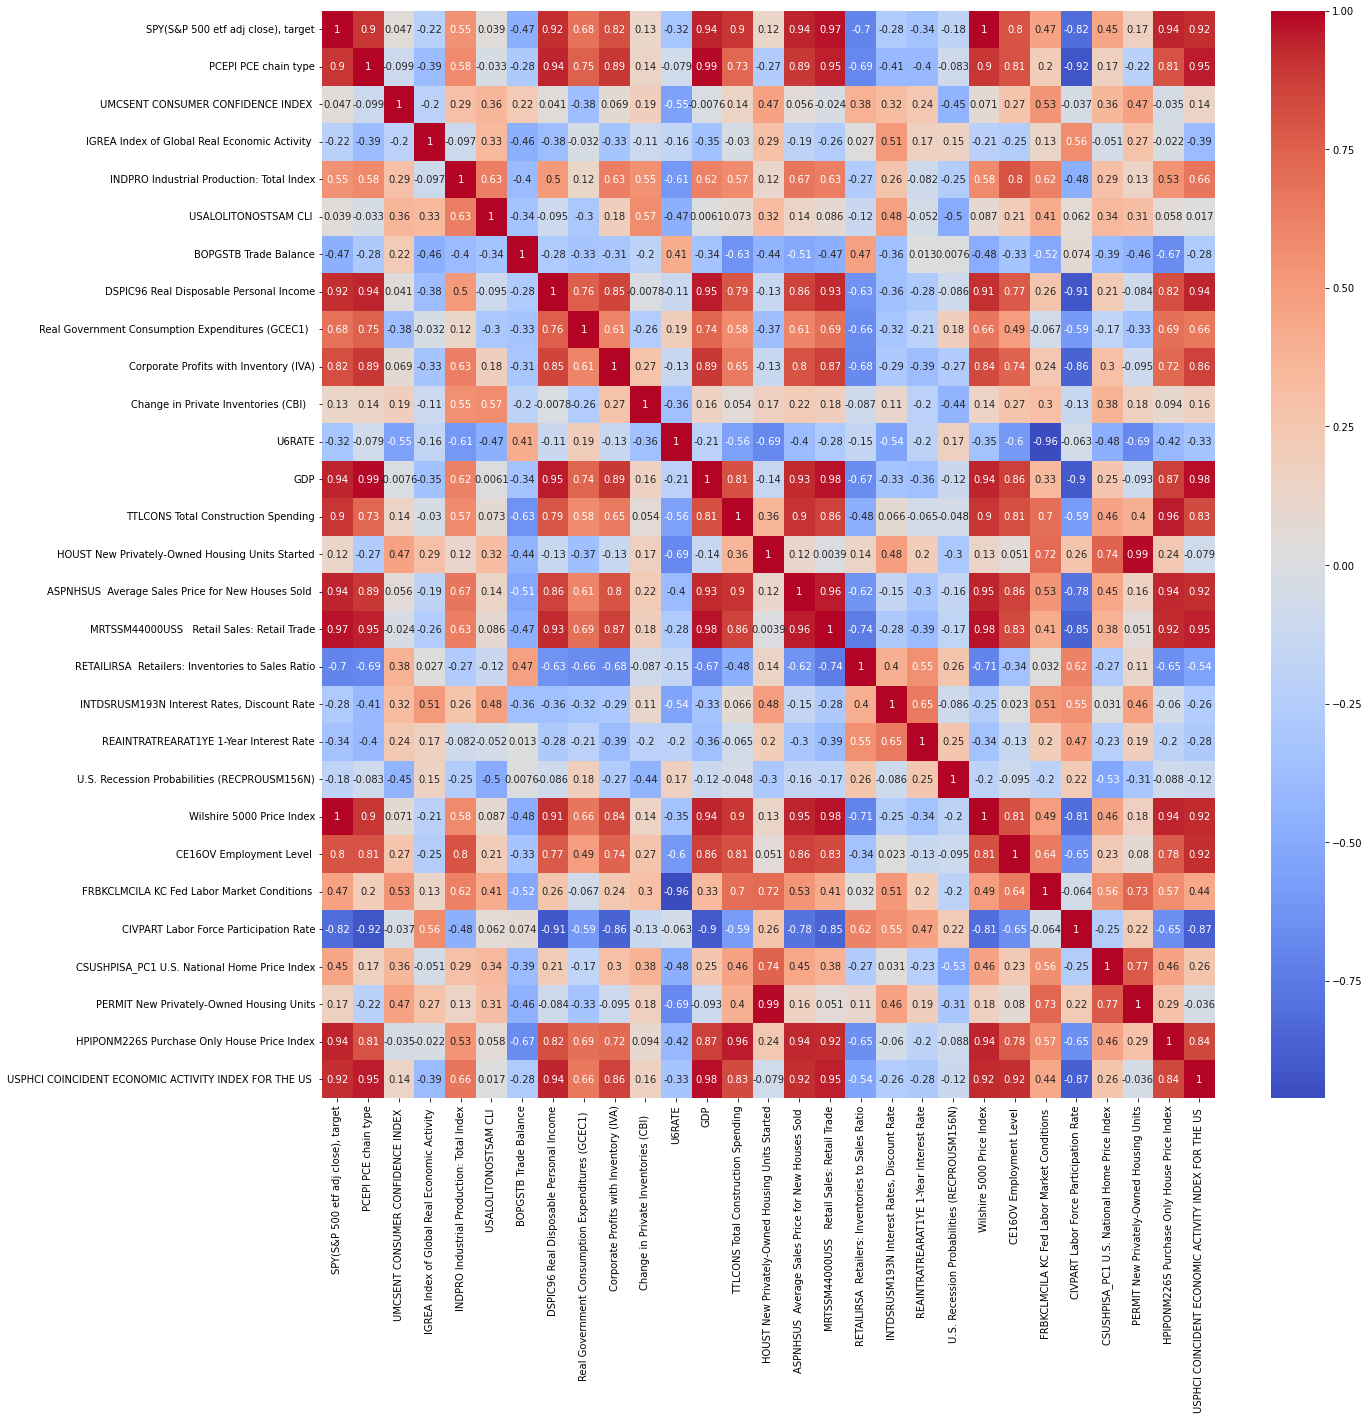

In [ ]:
# корреляционная матрица изначального признакового множества
plt.rcParams["figure.figsize"] = (20, 20)
corr = df.corr()
diverging_colors = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=diverging_colors)
plt.show()

In [ ]:
# признаковое множество для случайного леса
dfcools = pd.concat([df['SPY(S&P 500 etf adj close), target'], 
                    df['INTDSRUSM193N Interest Rates, Discount Rate'], 
                    df['FRBKCLMCILA KC Fed Labor Market Conditions '], 
                    df['Change in Private Inventories (CBI)   '],
                    df['Wilshire 5000 Price Index'],
                    df['GDP']],
                    axis=1, join='inner')
dfcools

,"SPY(S&P 500 etf adj close), target","INTDSRUSM193N Interest Rates, Discount Rate",FRBKCLMCILA KC Fed Labor Market Conditions,Change in Private Inventories (CBI),Wilshire 5000 Price Index,GDP
0,74.88906,1.25,0.12468,0.293,10284.68,10783.500
1,77.15961,1.25,0.16302,0.293,10800.00,10783.500
2,72.88053,1.25,0.20552,21.169,10500.87,10887.460
3,72.44807,1.25,0.12515,21.169,10232.53,10887.460
4,66.86682,1.25,0.10626,21.169,9606.97,10887.460
...,...,...,...,...,...,...
241,446.47070,0.50,1.37267,257.419,44868.22,24740.480
242,408.54970,0.50,1.27521,145.372,44745.75,25248.476
243,409.47190,1.00,1.40373,145.372,40970.51,25248.476
244,374.09070,1.75,1.37858,145.372,39549.93,25248.476


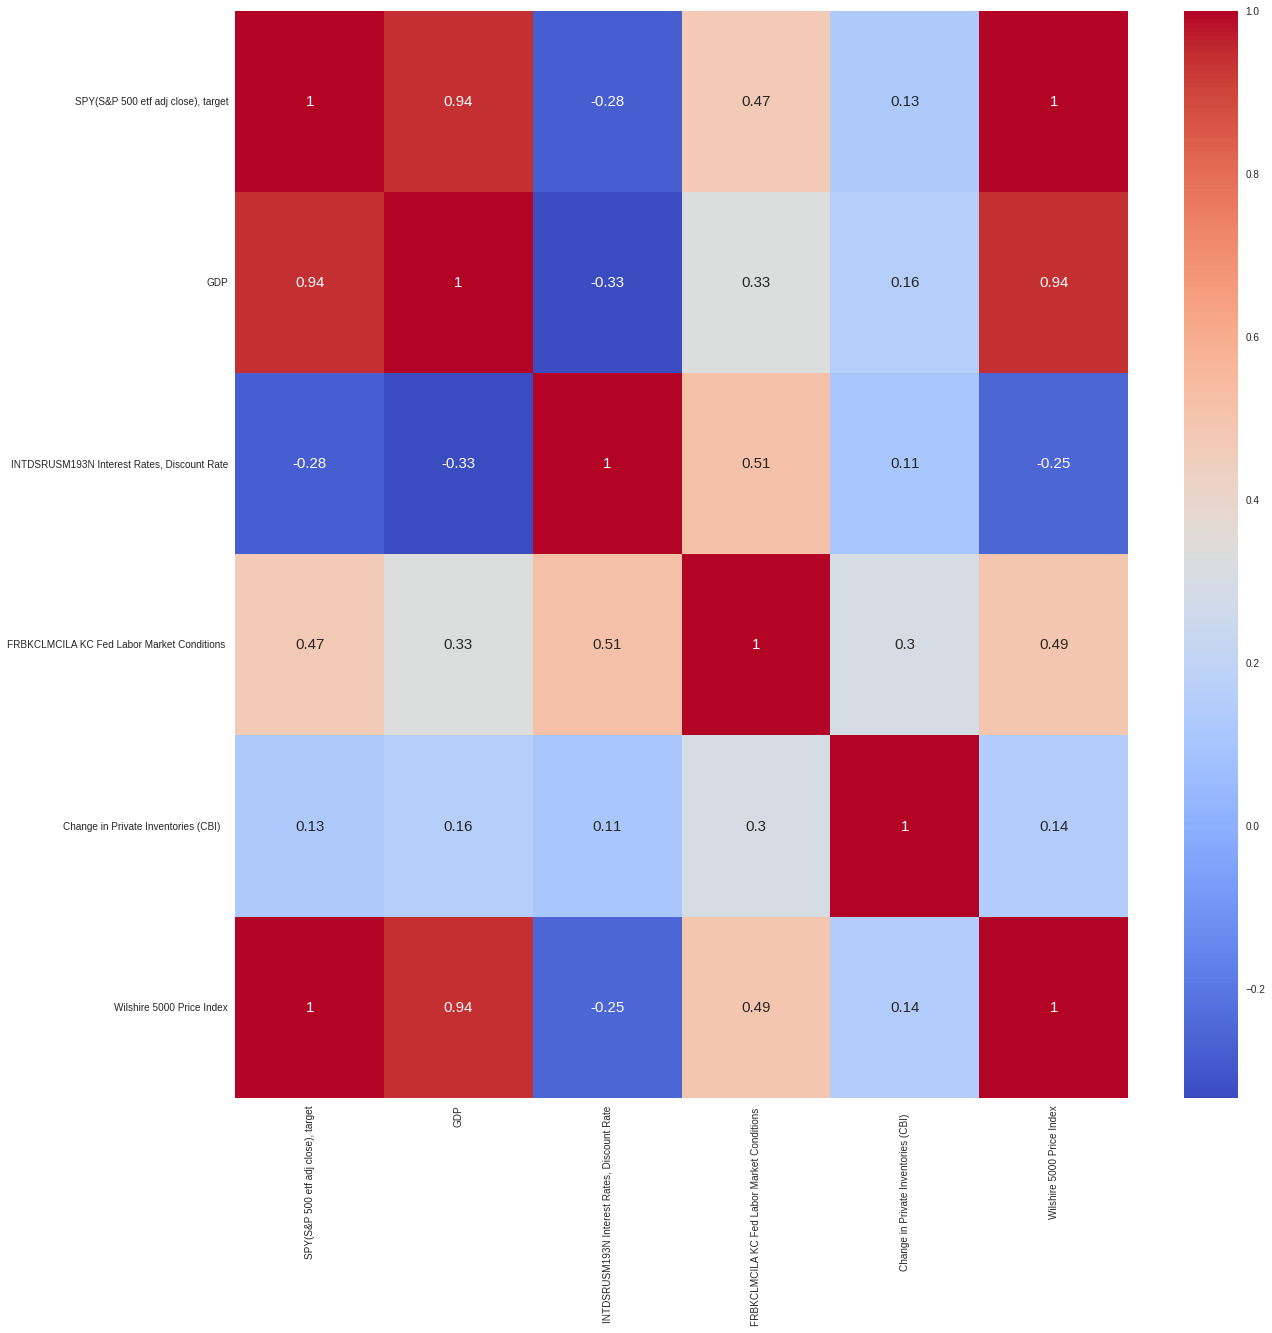

In [ ]:
# корреляционная матрица датасета для случ. леса dfcool
plt.rcParams["figure.figsize"] = (20, 20)
corr = dfcools.corr()
diverging_colors = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=diverging_colors)
plt.show()

Проверим стационарность рядов тестом Дики-Фуллера.
Где, 

Н0: ряд нестационарный 

Н1: ряд стационарныый

Выводимые значения - это p-value нулевой гипотезы.

In [ ]:
def check_stat(dataframe):
    for i in dataframe:
        pvalue = adfuller(dataframe[i].values)[1]
        print(f'p-value для {i} = {np.round(pvalue, 3)}')

In [ ]:
# стационарность всех изначальных признаков
check_stat(df)

p-value для SPY(S&P 500 etf adj close), target = 0.998
p-value для PCEPI PCE chain type = 0.997
p-value для UMCSENT CONSUMER CONFIDENCE INDEX  = 0.428
p-value для IGREA Index of Global Real Economic Activity  = 0.214
p-value для INDPRO Industrial Production: Total Index = 0.261
p-value для USALOLITONOSTSAM CLI  = 0.018
p-value для BOPGSTB Trade Balance = 0.247
p-value для DSPIC96 Real Disposable Personal Income = 0.251
p-value для Real Government Consumption Expenditures (GCEC1)   = 0.378
p-value для Corporate Profits with Inventory (IVA) = 0.138
p-value для Change in Private Inventories (CBI)    = 0.059
p-value для U6RATЕ = 0.188
p-value для GDP = 0.997
p-value для TTLCONS Total Construction Spending = 0.882
p-value для HOUST New Privately-Owned Housing Units Started = 0.436
p-value для ASPNHSUS  Average Sales Price for New Houses Sold  = 0.997
p-value для MRTSSM44000USS   Retail Sales: Retail Trade = 0.998
p-value для RETAILIRSA  Retailers: Inventories to Sales Ratio = 0.268
p-value 

Необходимо стационаризовать данные. Сделано это будет при помощи замены признаков их темпами прироста.

In [ ]:
def stationary(dataframe):
    dataframe1 = (dataframe/(dataframe.shift(1)+np.exp(-15)) - 1)
    dataframe1 = dataframe1[1:]
    
    return dataframe1

In [ ]:
# стационарный датасет случайного леса
df1_s = stationary(dfcools)
df1_s.head()

,"SPY(S&P 500 etf adj close), target","INTDSRUSM193N Interest Rates, Discount Rate",FRBKCLMCILA KC Fed Labor Market Conditions,Change in Private Inventories (CBI),Wilshire 5000 Price Index,GDP
1,0.030319,-2.447218e-07,0.307504,-1.044034e-06,0.050106,-2.836775e-11
2,-0.055458,-2.447218e-07,0.260702,7.124907e+01,-0.027697,9.640655e-03
3,-0.005934,-2.447218e-07,-0.391058,-1.445049e-08,-0.025554,-2.809686e-11
4,-0.077038,-2.447218e-07,-0.150941,-1.445049e-08,-0.061134,-2.809686e-11
5,-0.075595,-2.447218e-07,-0.151047,2.014266e-01,-0.109166,8.870756e-03


In [ ]:
# стационарный изначальный датасет 
df1 = stationary(df)
df1.head()

,"SPY(S&P 500 etf adj close), target",PCEPI PCE chain type,UMCSENT CONSUMER CONFIDENCE INDEX,IGREA Index of Global Real Economic Activity,INDPRO Industrial Production: Total Index,USALOLITONOSTSAM CLI,BOPGSTB Trade Balance,DSPIC96 Real Disposable Personal Income,Real Government Consumption Expenditures (GCEC1),Corporate Profits with Inventory (IVA),...,REAINTRATREARAT1YE 1-Year Interest Rate,U.S. Recession Probabilities (RECPROUSM156N),Wilshire 5000 Price Index,CE16OV Employment Level,FRBKCLMCILA KC Fed Labor Market Conditions,CIVPART Labor Force Participation Rate,CSUSHPISA_PC1 U.S. National Home Price Index,PERMIT New Privately-Owned Housing Units,HPIPONM226S Purchase Only House Price Index,USPHCI COINCIDENT ECONOMIC ACTIVITY INDEX FOR THE US
1,0.030319,0.002728,0.055127,-0.215864,0.007607,0.001996,-0.041230,0.000672,-1.070585e-10,-3.588331e-10,...,0.262864,-0.650485,0.050106,-0.001913,0.307504,-2.994017e-03,0.030303,-0.053721,0.006449,0.000566
2,-0.055458,0.004180,-0.028213,-0.022404,0.004811,0.000825,0.089984,0.003399,7.680581e-03,3.606485e-02,...,-0.507439,-0.500000,-0.027697,-0.000375,0.260702,1.501497e-03,0.044118,-0.013010,0.005202,-0.000226
3,-0.005934,0.000646,0.041935,0.113092,0.004331,-0.000519,0.001796,0.004067,-1.062426e-10,-3.463423e-10,...,-0.796638,-0.222223,-0.025554,0.003034,-0.391058,-4.586242e-09,0.070422,0.028161,0.006880,0.001584
4,-0.077038,0.001254,-0.046440,0.089791,0.008191,-0.001786,0.020749,0.003045,-1.062426e-10,-3.463423e-10,...,3.103888,-0.000001,-0.061134,-0.000908,-0.150941,-1.499255e-03,0.052632,0.024476,0.006394,0.001016
5,-0.075595,0.002208,-0.046537,0.017345,-0.000229,-0.002577,-0.023581,-0.002481,5.174207e-03,3.549897e-02,...,-0.424519,1.357140,-0.109166,-0.000015,-0.151047,-1.501506e-03,0.037500,-0.011377,0.006166,0.001015


In [ ]:
check_stat(df1)

p-value для SPY(S&P 500 etf adj close), target = 0.0
p-value для PCEPI PCE chain type = 0.0
p-value для UMCSENT CONSUMER CONFIDENCE INDEX  = 0.0
p-value для IGREA Index of Global Real Economic Activity  = 0.0
p-value для INDPRO Industrial Production: Total Index = 0.0
p-value для USALOLITONOSTSAM CLI  = 0.0
p-value для BOPGSTB Trade Balance = 0.0
p-value для DSPIC96 Real Disposable Personal Income = 0.116
p-value для Real Government Consumption Expenditures (GCEC1)   = 0.135
p-value для Corporate Profits with Inventory (IVA) = 0.0
p-value для Change in Private Inventories (CBI)    = 0.0
p-value для U6RATЕ = 0.0
p-value для GDP = 0.0
p-value для TTLCONS Total Construction Spending = 0.0
p-value для HOUST New Privately-Owned Housing Units Started = 0.0
p-value для ASPNHSUS  Average Sales Price for New Houses Sold  = 0.0
p-value для MRTSSM44000USS   Retail Sales: Retail Trade = 0.003
p-value для RETAILIRSA  Retailers: Inventories to Sales Ratio = 0.001
p-value для INTDSRUSM193N Interest R

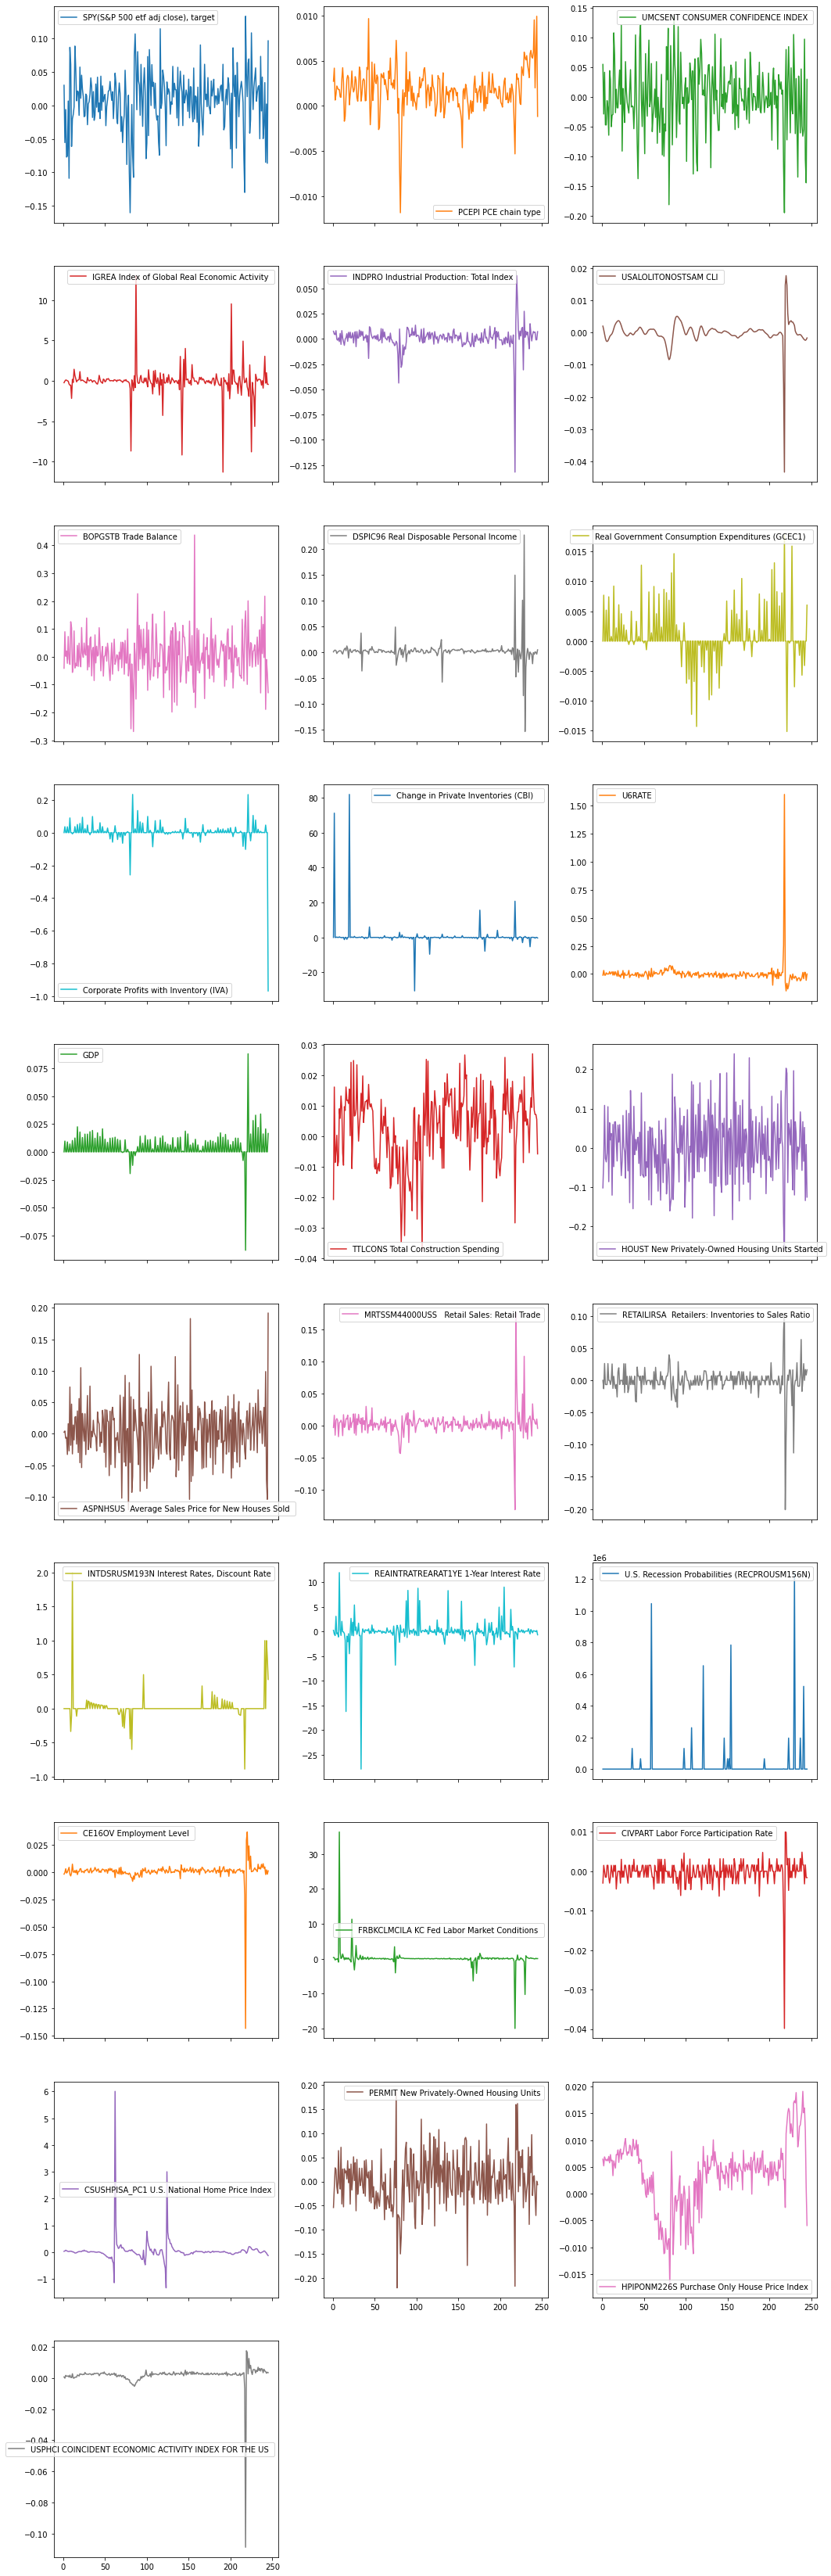

In [ ]:
# Глянем на графики
df1.plot(subplots=True, layout=(10,3), figsize=(17.5, 60))
plt.show()

Данные полностью стационарны. 

Теперь необходимо проверить данные на гетероскедастичность. Для этого воспользуемся тестом Бройша-Пагана.

In [ ]:
X = df1.iloc[:, 1:]
X = sm.add_constant(X)

y = df1.iloc[:, 0].values

model0 = sm.OLS(y, X).fit()

In [ ]:
# Н0: Гомоскедастичность данных
# Н1: Гетероскедастичность данных

BP_test = het_breuschpagan(model0.resid,  model0.model.exog)

print('Breusch-Pagan Statistic p-value:', np.round(BP_test[1], 2))

Breusch-Pagan Statistic p-value: 0.62


Так как p-value > 0.05, то мы не можем отвергнуть нулевую гипотезу. Таким образом нельзя с увереностью сказать, что в модели наблюдается гетероскедастичность.

Проверим остатки модели на автокоррелированность при помощи теста Бройша-Годфри

In [ ]:
# Н0: Автокорреляции остатков нет
# Н1: Автокорреляция остатков есть 

BG_test = acorr_breusch_godfrey(model0, nlags = 1) 

print('Breusch-Godfrey Statistic p-value:', np.round(BG_test[1], 2))

Breusch-Godfrey Statistic p-value: 0.0


Так как p-value < 0.05, то мы отвергаем нулевую гипотезу. Таким образом в модели присутствует автокорреляция остатков соседних наблюдений.

Теперь необходимо проверить значимость коэффициентов регрессии. Сделано это будет с помощью итеративного метода отбора регрессоров с помощью теста Стьюдента на значимость, где ковариационная матрица будет взята из поправок Newey-West для исключения автокорреляции. Для этого построим сначала регрессию обычным МНК.

In [ ]:
# Получим не-автокоррелированные и гомоскедастичные оценки ст. ошибки коэф-ов
model_auto = model0.get_robustcov_results(cov_type = "HAC", maxlags=1)
st_err = model_auto.bse[1:]
coef = model_auto.params[1:]

Здесь True/False это ответы на условие |t_st| > t_cr, соответсвенно, True показывает значимые коэффициенты, а False - наоборот.

In [ ]:
for num, i in enumerate(df1.iloc[:,1:]):

    ttest = coef[num]/st_err[num]
    
    print(f't-st for {i} = {abs(ttest)>2.58}')

t-st for PCEPI PCE chain type = False
t-st for UMCSENT CONSUMER CONFIDENCE INDEX  = False
t-st for IGREA Index of Global Real Economic Activity  = False
t-st for INDPRO Industrial Production: Total Index = False
t-st for USALOLITONOSTSAM CLI  = False
t-st for BOPGSTB Trade Balance = False
t-st for DSPIC96 Real Disposable Personal Income = False
t-st for Real Government Consumption Expenditures (GCEC1)   = False
t-st for Corporate Profits with Inventory (IVA) = True
t-st for Change in Private Inventories (CBI)    = False
t-st for U6RATЕ = False
t-st for GDP = True
t-st for TTLCONS Total Construction Spending = False
t-st for HOUST New Privately-Owned Housing Units Started = True
t-st for ASPNHSUS  Average Sales Price for New Houses Sold  = False
t-st for MRTSSM44000USS   Retail Sales: Retail Trade = False
t-st for RETAILIRSA  Retailers: Inventories to Sales Ratio = False
t-st for INTDSRUSM193N Interest Rates, Discount Rate = False
t-st for REAINTRATREARAT1YE 1-Year Interest Rate = False

Алгоритм прост: мы будем строить регрессию, замерять тест Стьюдента, если он показывает незначимость коэф., то мы исключаем этот признак, строим регрессию вновь и замеряем тест Стьюдента и по новой.

In [ ]:
df1 = stationary(df)

In [ ]:
dum = 1
print("Исключенные из модели незначимые переменные:\n")
while dum != 0:
    X = df1.iloc[:, 1:]
    X = sm.add_constant(X)

    y = df1.iloc[:, 0].values

    model2 = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    std_err2 = model2.bse[1:]
    coef2 = model2.params[1:]
    
    min = 0
    dum = 0
    
    for i, x in enumerate(X.iloc[:, 1:]):
        t_obs = abs(coef2[i]/std_err2[i])
        
        if t_obs < 2.58: 
            dum = 1
            
            if t_obs < coef2[min]/std_err2[min]:
                min = i
    
    print("· ", X.columns[min+1])    
    
    del df1[X.columns[min+1]]

Исключенные из модели незначимые переменные:

·  PCEPI PCE chain type
·  UMCSENT CONSUMER CONFIDENCE INDEX 
·  INDPRO Industrial Production: Total Index
·  PERMIT New Privately-Owned Housing Units
·  CE16OV Employment Level 
·  USPHCI COINCIDENT ECONOMIC ACTIVITY INDEX FOR THE US 
·  INTDSRUSM193N Interest Rates, Discount Rate
·  BOPGSTB Trade Balance
·  IGREA Index of Global Real Economic Activity 
·  Real Government Consumption Expenditures (GCEC1)  
·  Change in Private Inventories (CBI)   
·  ASPNHSUS  Average Sales Price for New Houses Sold 
·  MRTSSM44000USS   Retail Sales: Retail Trade
·  RETAILIRSA  Retailers: Inventories to Sales Ratio
·  DSPIC96 Real Disposable Personal Income
·  REAINTRATREARAT1YE 1-Year Interest Rate
·  CSUSHPISA_PC1 U.S. National Home Price Index
·  U.S. Recession Probabilities (RECPROUSM156N)
·  CIVPART Labor Force Participation Rate
·  HPIPONM226S Purchase Only House Price Index
·  TTLCONS Total Construction Spending
·  USALOLITONOSTSAM CLI 
·  Corporate

In [ ]:
# по итогу имеем
print(df1.shape)
df1.head()

(245, 4)


,"SPY(S&P 500 etf adj close), target",GDP,Wilshire 5000 Price Index,FRBKCLMCILA KC Fed Labor Market Conditions
1,0.030319,-2.836775e-11,0.050106,0.307504
2,-0.055458,9.640655e-03,-0.027697,0.260702
3,-0.005934,-2.809686e-11,-0.025554,-0.391058
4,-0.077038,-2.809686e-11,-0.061134,-0.150941
5,-0.075595,8.870756e-03,-0.109166,-0.151047


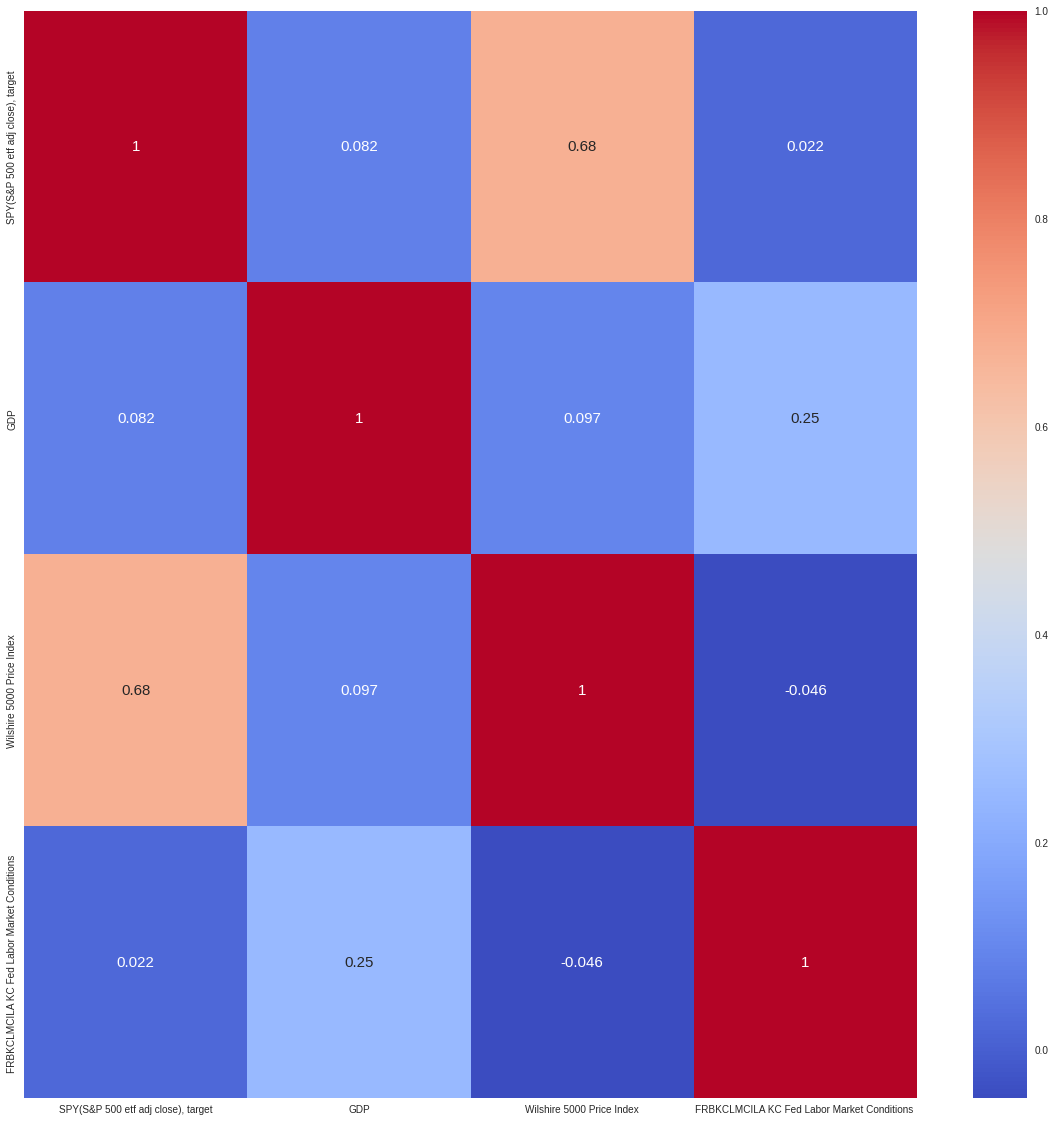

In [ ]:
# корреляционная матрица датасета для случ. леса dfcool
plt.rcParams["figure.figsize"] = (20, 20)
corr = df1.corr()
diverging_colors = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=diverging_colors)
plt.show()

Выясним качество подгонки:

In [ ]:
X = df1.iloc[:, 1:]

y = df1.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1984)

In [ ]:
model3 = LinearRegression()
model3.fit(X_train, y_train)
print(mse(model3.predict(X_test), y_test))
np.round(model3.coef_, 2)

0.0011964256845757486


array([-0.12,  0.8 ,  0.  ])

Проверим какой результат бы дала лучшая гребневая регрессия.

In [ ]:
df_full = stationary(df)

X = df_full.iloc[:, 1:]
y = df_full.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1984)

In [ ]:
gscv = GridSearchCV(Ridge(),
             param_grid={'alpha': np.arange(0.01, 1., 0.0005)})
gscv.fit(X, y)
best = gscv.best_params_['alpha']
best

0.014000000000000004

In [ ]:
model4 = Ridge(best)
model4.fit(X_train, y_train)
print(mse(model4.predict(X_test), y_test))
np.round(model4.coef_, 2)

0.0017759321174617884


array([-0.13, -0.11,  0.  ,  0.12,  0.12,  0.02, -0.05,  0.14,  0.09,
        0.  ,  0.1 ,  0.14,  0.18, -0.07,  0.01,  0.01, -0.02, -0.01,
       -0.  ,  0.  ,  0.84,  0.02,  0.  , -0.04,  0.  , -0.01, -0.12,
        0.04])

Обучим модель случайного леса

In [ ]:
X = df1_s.iloc[:, 1:]
y = df1_s.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1984)

Подберем гиперпараметры для случайного леса на кросс-валидации

In [ ]:
rgrs = RandomForestRegressor(max_features=1)
rgrscv = GridSearchCV(RandomForestRegressor(criterion='friedman_mse'),
                      param_grid={'min_samples_leaf': np.arange(1, 5, 2),
                                  'min_samples_split': np.arange(0.2, 0.4, 0.01),
                                  'n_estimators': np.arange(80, 120, 5)
                                  })
rgrscv.fit(X, y)
rgrsbest = rgrscv.best_params_

In [ ]:
rgrsbest # лучшие гиперпараметры

{'min_samples_leaf': 1,
 'min_samples_split': 0.35000000000000014,
 'n_estimators': 105}

Проверим ошибку получившейся модели случайного леса

In [ ]:
rg = RandomForestRegressor(min_samples_split = rgrsbest['min_samples_split'],
                           min_samples_leaf = rgrsbest['min_samples_leaf'],
                           n_estimators = rgrsbest['n_estimators'],
                           criterion='friedman_mse', random_state = 1984
                           )
rg.fit(X_train, y_train)
print(mse(rg.predict(X_test), y_test))

0.0012524590388955311


Как видим, ошибка нашей модели с последовательно исключенными незначимыми переменными меньше, чем при использовании Ridge регрессии.

(Перед следующим разделом нужно вернуться и опять запустить цикл удаления незначимых регрессоров)

# **Построим регрессии для тикеров**




In [ ]:
tcrs = pd.read_excel('data', sheet_name='ETF', header=0)
tcrs = tcrs.iloc[:, 1:]
tcrs.head()

,Energy Select Sector SPDR Fund (XLE),Financial Select Sector SPDR Fund (XLF),Utilities Select Sector SPDR Fund (XLU),Industrial Select Sector SPDR Fund (XLI),Technology Select Sector SPDR Fund (XLK),Health Care Select Sector SPDR Fund (XLV),Consumer Discretionary Select Sector SPDR Fund (XLY),Consumer Staples Select Sector SPDR Fund (XLP),Materials Select Sector SPDR Fund (XLB),iShares U.S. Telecom ETF (IYZ),iShares U.S. Real Estate ETF (IYR)
0,15.524194,20.755484,12.900230,17.945606,15.767756,20.063463,23.065474,15.475925,14.625232,15.18213,17.44486
1,16.841679,22.055241,13.478995,18.377377,16.546602,21.217936,23.329514,15.680181,15.024447,15.06712,18.24355
2,16.290146,21.494720,12.763548,17.159063,14.546045,21.098291,22.705736,15.141058,14.362875,12.91810,18.55564
3,16.003532,21.429731,12.657471,17.233484,13.942815,21.392422,22.589090,14.972358,15.074979,12.96427,18.91394
4,15.325014,20.422421,11.693089,16.137365,12.079702,19.857216,21.360502,13.405836,14.744355,10.78914,18.93565


In [ ]:
tcrs_st = stationary(tcrs)
tcrs_st.head()

,Energy Select Sector SPDR Fund (XLE),Financial Select Sector SPDR Fund (XLF),Utilities Select Sector SPDR Fund (XLU),Industrial Select Sector SPDR Fund (XLI),Technology Select Sector SPDR Fund (XLK),Health Care Select Sector SPDR Fund (XLV),Consumer Discretionary Select Sector SPDR Fund (XLY),Consumer Staples Select Sector SPDR Fund (XLP),Materials Select Sector SPDR Fund (XLB),iShares U.S. Telecom ETF (IYZ),iShares U.S. Real Estate ETF (IYR)
1,0.084867,0.062622,0.044865,0.024060,0.049395,0.057541,0.011447,0.013198,0.027296,-0.007575,0.045784
2,-0.032748,-0.025414,-0.053079,-0.066294,-0.120904,-0.005639,-0.026738,-0.034382,-0.044033,-0.142630,0.017107
3,-0.017594,-0.003024,-0.008311,0.004337,-0.041470,0.013941,-0.005137,-0.011142,0.049579,0.003574,0.019309
4,-0.042398,-0.047005,-0.076191,-0.063604,-0.133625,-0.071764,-0.054389,-0.104628,-0.021932,-0.167779,0.001148
5,-0.133358,-0.083135,-0.138972,-0.054313,-0.094817,-0.028658,-0.117803,-0.039780,-0.108969,-0.122198,-0.033059


Составленим выборку, на которой мы построим регрессию (тренировочная часть) и будем измерять ее точность (тестовая часть).


---

Она будет выглядеть следующим образом, весь период делится на 4 части, каждая из которых будет три раза частью тренировочной выборки и по одному разу будет выступать в качестве тестовой. Также у нас 11 целевых переменных, таким образом общее число моделе, что мы должны построить 11*4 = 44.

Посчитаем ошибки для наших регрессий по тикерам. В данном случае "fold where ..." специфицирует в каком диапозоне лежит тестовая выборка в данном случае.

In [ ]:
X = df1.iloc[:, 1:].values

y = tcrs_st.values

In [ ]:
kf = KFold(n_splits=4)
    
for i, (train_index, test_index) in enumerate(kf.split(y)):
    
    print(f'\nOn fold where X_test lies from {dates[test_index[0]].date()} to {dates[test_index[-1]].date()} loss is: \n')
    
    for num, i in enumerate(tcrs.columns):      
        
        model = RandomForestRegressor(min_samples_split = rgrsbest['min_samples_split'],
                                      min_samples_leaf = rgrsbest['min_samples_leaf'],
                                      criterion='friedman_mse'
                                      )
        model.fit(X[train_index], tcrs_st.iloc[train_index, num])
        #print(model.coef_)
        print(f'{i[-4:-1]} = {np.round(mse(model.predict(X[test_index]), tcrs_st.iloc[test_index, num]), 5)}')


On fold where X_test lies from 2002-02-01 to 2007-03-01 loss is: 

XLE = 0.00771
XLF = 0.00261
XLU = 0.00303
XLI = 0.00317
XLK = 0.00724
XLV = 0.00222
XLY = 0.00512
XLP = 0.00173
XLB = 0.0055
IYZ = 0.00848
IYR = 0.00531

On fold where X_test lies from 2007-04-01 to 2012-04-01 loss is: 

XLE = 0.00592
XLF = 0.00872
XLU = 0.00169
XLI = 0.0051
XLK = 0.00393
XLV = 0.00202
XLY = 0.00447
XLP = 0.00133
XLB = 0.00612
IYZ = 0.00395
IYR = 0.00842

On fold where X_test lies from 2012-05-01 to 2017-05-01 loss is: 

XLE = 0.00254
XLF = 0.00171
XLU = 0.00153
XLI = 0.00111
XLK = 0.00117
XLV = 0.00127
XLY = 0.00118
XLP = 0.00092
XLB = 0.00176
IYZ = 0.00202
IYR = 0.00139

On fold where X_test lies from 2017-06-01 to 2022-06-01 loss is: 

XLE = 0.01495
XLF = 0.0058
XLU = 0.00241
XLI = 0.00518
XLK = 0.00617
XLV = 0.00254
XLY = 0.00563
XLP = 0.00214
XLB = 0.00527
IYZ = 0.00537
IYR = 0.0055


Рассчитаем ошибки для наших случайных лесов по тикерам. В данном случае "fold where ..." специфицирует в каком диапозоне лежит тестовая выборка в данном случае.

In [ ]:
X = df1_s.iloc[:, 1:].values

y = tcrs_st.values

In [ ]:
kf = KFold(n_splits=4)
    
for i, (train_index, test_index) in enumerate(kf.split(y)):
    
    print(f'\nOn fold where X_test lies from {dates[test_index[0]].date()} to {dates[test_index[-1]].date()} loss is: \n')
    
    for num, i in enumerate(tcrs.columns):      
        
        model = RandomForestRegressor(min_samples_split = rgrsbest['min_samples_split'],
                                      min_samples_leaf = rgrsbest['min_samples_leaf'],
                                      n_estimators = rgrsbest['n_estimators'],
                                      criterion='friedman_mse'
                                      )
        model.fit(X[train_index], tcrs_st.iloc[train_index, num])
        
        print(f'{i[-4:-1]} = {np.round(mse(model.predict(X[test_index]), tcrs_st.iloc[test_index, num]), 5)}')


On fold where X_test lies from 2002-02-01 to 2007-03-01 loss is: 

XLE = 0.00274
XLF = 0.00122
XLU = 0.0022
XLI = 0.00098
XLK = 0.00303
XLV = 0.00072
XLY = 0.00125
XLP = 0.00064
XLB = 0.00198
IYZ = 0.0039
IYR = 0.00218

On fold where X_test lies from 2007-04-01 to 2012-04-01 loss is: 

XLE = 0.00368
XLF = 0.00634
XLU = 0.00144
XLI = 0.00326
XLK = 0.00216
XLV = 0.00145
XLY = 0.00299
XLP = 0.00108
XLB = 0.0044
IYZ = 0.00267
IYR = 0.00659

On fold where X_test lies from 2012-05-01 to 2017-05-01 loss is: 

XLE = 0.00196
XLF = 0.00117
XLU = 0.00176
XLI = 0.00087
XLK = 0.00103
XLV = 0.00106
XLY = 0.0011
XLP = 0.00094
XLB = 0.0013
IYZ = 0.00177
IYR = 0.00172

On fold where X_test lies from 2017-06-01 to 2022-06-01 loss is: 

XLE = 0.00991
XLF = 0.00311
XLU = 0.00196
XLI = 0.00251
XLK = 0.00207
XLV = 0.00158
XLY = 0.00277
XLP = 0.00132
XLB = 0.00239
IYZ = 0.00181
IYR = 0.00227


# Алгоритм с обновлением инициализации 

Алгоритм портфеля следующий: каждый месяц мы **делаем предсказание об изменении курса акций в следующем месяце**. Затем **r% количества акций**, **которым** было **предсказано падение** в цене в следующем месяце, **продаются**. 

**Из получившихся денег покупаем** (иначе говоря реинвестируем в) **акции, что**, как предсказывается, **возрастут в цене в следующем месяце**, притом следующим образом: **нормируем к единице все предсказания положительных приращений стоимостей**, то есть их сумма станет равна единице, таким образом мы получили **доли**, по которым нам необходимо распределить средства. Потом **помножаем на этот вектор долей размер реинвестирумых средств и делим на вектор стоимостей акций в текущем месяце**. 

Результирующий вектор почленно суммируется в размер реинвестируемых средств, то есть, таким образом, **мы и распределили все реинвестируемые средства по акциям в зависимости от их предполагаемого темпа роста**.


In [ ]:
def one_norm(x):
    return x/abs(np.sum(x) + np.exp(-15))


    
def best_params_evaluation(train_index):
    inv = 10**7
    r = np.arange(0.0001, 0.25, 0.01)
    r_max = r[0]
    value_max = 0

    X_train = df1_s.iloc[train_index, 1:].values
    y_train = tcrs_st.iloc[train_index, :].values

    rgrscv_alg = GridSearchCV(RandomForestRegressor(criterion='friedman_mse', 
                              random_state=1984),
                              param_grid={'min_samples_leaf': np.arange(1, 5, 2),
                                  'min_samples_split': np.arange(0.2, 0.4, 0.01),
                                  'n_estimators': np.arange(80, 120, 5)
                                          })
    rgrscv_alg.fit(X_train, y_train)
    rgrsbest_alg = rgrscv_alg.best_params_

    model = RandomForestRegressor(n_estimators=rgrsbest_alg['n_estimators'], 
                                  min_samples_split = rgrsbest_alg['min_samples_split'],
                                  min_samples_leaf = rgrsbest_alg['min_samples_leaf'],
                                  criterion='friedman_mse', random_state = 1984
                                  )
    model.fit(X_train, y_train)
    for_err = mse(model.predict(X_train), y_train) 
    
    
    model_add = LinearRegression()
    model_add.fit(df1.iloc[train_index, 1:].values, y_train)
    reg_err = mse(model_add.predict(df1.iloc[train_index, 1:].values), y_train) 

    w_for = 1/(1 + for_err/reg_err)
    w_reg = 1 - w_for

    init_price = tcrs.iloc[train_index[0], :].values
    init_stocks = inv/11 / init_price
    curr_stocks = inv/11 / init_price
    reinv = 0
    
    for r_ in r:
        for i, (target, features) in enumerate(zip(y_train, X_train)):
            curr_price = target 
    
            pred_change = w_for * model.predict([features])[0] + w_reg * \
            model_add.predict([df1.iloc[train_index, 1:].values[i]])[0]
            
            bool_change = w_for * model.predict([features])[0] + w_reg * \
            model_add.predict([df1.iloc[train_index, 1:].values[i]])[0]

            bool_change[bool_change>0] = 0
            bool_change[bool_change<0] = 1

            if np.sum(bool_change) < 10:
                
                reinv += np.sum(bool_change * curr_stocks * r_ * curr_price)
                curr_stocks -= r_ * bool_change * curr_stocks

                pred_change[pred_change < 0] = 0
                purch_stocks = (reinv * one_norm(pred_change)) / curr_price
                curr_stocks += purch_stocks
                
                reinv -= np.sum(curr_price * purch_stocks)

        value = np.sum(curr_stocks * curr_price)
        
        if value > value_max:
            
            value_max = value
            r_max = r_
                
    return r_max, rgrsbest_alg, w_for

In [ ]:
kf = KFold(n_splits=4)

inv = 10**7
start = inv
algorithm_logs = []
snp_logs = []
base_logs = []

for z, (train_index, test_index) in enumerate(kf.split(tcrs_st.values)):
    
    dum = best_params_evaluation(train_index)
    best = dum[1]
    w_for = dum[2]
    w_reg = 1 - w_for

    model = RandomForestRegressor(n_estimators=best['n_estimators'], 
                                  min_samples_split = best['min_samples_split'],
                                  min_samples_leaf = best['min_samples_leaf'],
                                  criterion='friedman_mse', random_state=1984
                                  )
    model.fit(df1_s.iloc[train_index, 1:].values, tcrs_st.iloc[train_index, :].values)

    model_add = LinearRegression()
    model_add.fit(df1.iloc[train_index, 1:].values, tcrs_st.iloc[train_index, :].values)

    init_stocks = inv/11 / tcrs.iloc[0, :].values
    curr_stocks = start/11 / tcrs.iloc[test_index[0], :]
    reinv = 0
    
    r = dum[0]

    for i, (target, features) in enumerate(zip(tcrs.iloc[test_index+1, :].values, df1_s.iloc[test_index, 1:].values)):
      
        curr_price = target 
        
        pred_change = w_for * model.predict([features])[0] + w_reg * \
        model_add.predict([df1.iloc[test_index, 1:].values[i]])[0]
        
        bool_change = w_for * model.predict([features])[0] + w_reg * \
        model_add.predict([df1.iloc[test_index, 1:].values[i]])[0]
        
        bool_change[bool_change>0] = 0
        bool_change[bool_change<0] = 1

        algorithm_logs.append(np.round(np.sum(curr_stocks * curr_price) - inv))
        snp_logs.append(np.round(inv/(df.iloc[0, 0]) * df.iloc[test_index[i]+1, 0] - inv))
        base_logs.append(np.round(np.sum(curr_price * init_stocks) - inv))

        if np.sum(bool_change) < 10:
            
            reinv += np.sum(bool_change * curr_stocks * r * curr_price)
            curr_stocks -= r * bool_change * curr_stocks

            pred_change[pred_change < 0] = 0
            purch_stocks = (reinv * one_norm(pred_change)) / curr_price
            curr_stocks += purch_stocks
            
            reinv -= np.sum(curr_price * purch_stocks)
        
    start = np.sum(curr_stocks * curr_price)

profit = np.round(np.sum(curr_stocks * curr_price) - inv)
snprofit = np.round(inv/(df.iloc[0, 0]) * df.iloc[-1, 0] - inv)
baseline = np.round(np.sum(tcrs.iloc[-1,:] * init_stocks) - inv)

del algorithm_logs[-1]
algorithm_logs.append(profit)

weights = one_norm(curr_price * curr_stocks)

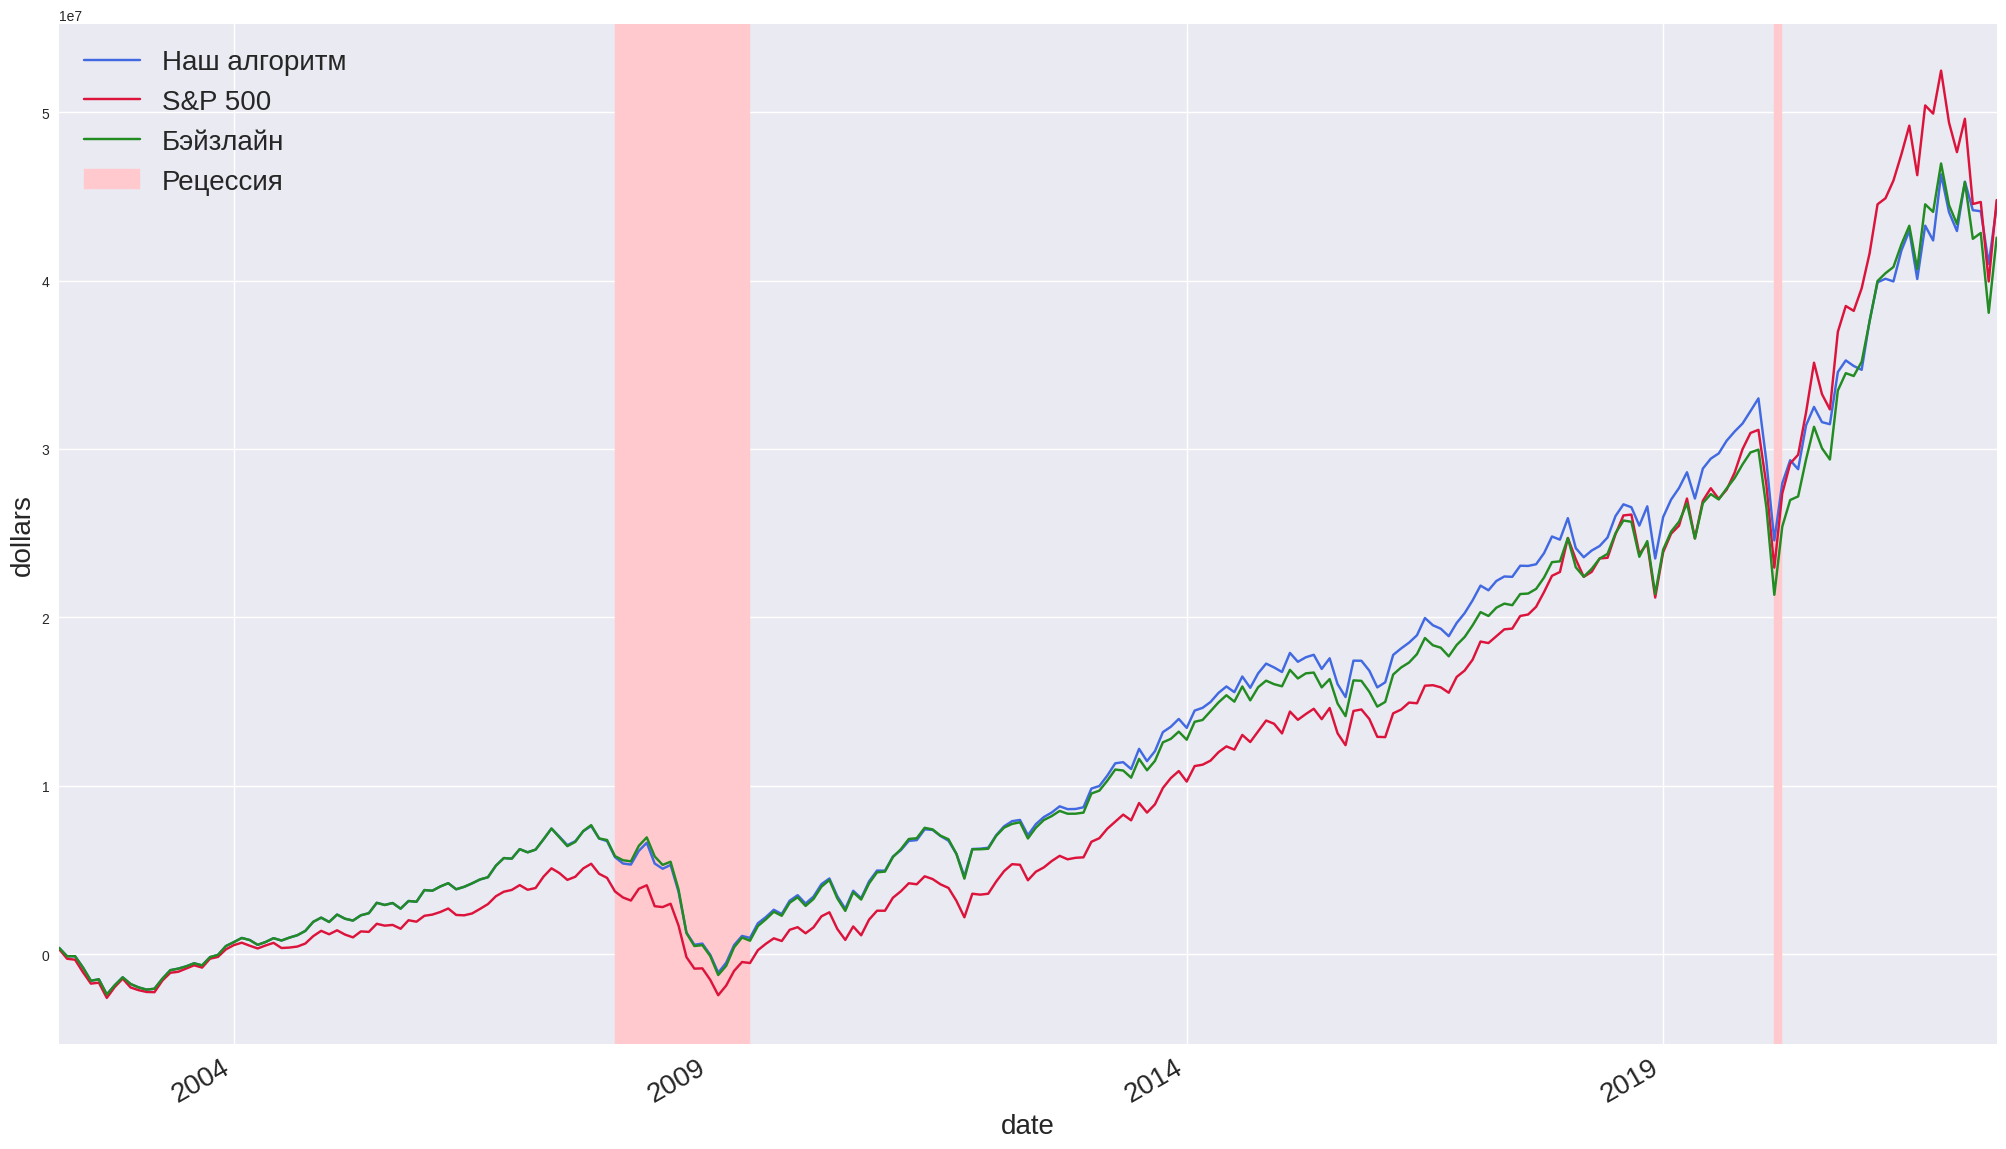

Доходности за весь период с 2002-03-01 по 2022-06-01 составили:
· Для портфеля, построенного по нашему алгоритму 44409002.0 (104.36%)
· Для портфеля-бейзлайна ----------------------- 42554223.0 (100%)
· Для портфеля, состоящего лишь из акций S&P 500 44788310.0 (105.25%)


In [ ]:
mpl.style.use('seaborn-v0_8')
DF = pd.DataFrame()
DF['value'] = algorithm_logs
DF['value2'] = snp_logs
DF['value3'] = base_logs
DF = DF.set_index(dates[1:])
DF.plot(figsize=(25,15), color = ['royalblue', 'crimson', 'forestgreen'])
plt.gcf().autofmt_xdate()
plt.axvspan(np.datetime64('2008-01-01'), np.datetime64('2009-06-01'), color = '#FFC9CE')
plt.axvspan(np.datetime64('2020-03-01'), np.datetime64('2020-04-01'), color = '#FFC9CE')
plt.legend(['Наш алгоритм', 'S&P 500', 'Бэйзлайн', 'Рецессия'], fontsize = 20)
plt.xlabel('date', fontsize = 20)
plt.ylabel('dollars', fontsize = 20)
plt.xticks(fontsize=20)
plt.show()

print(f'Доходности за весь период с {dates[1].date()} по {dates[244].date()} составили:')
print(f'· Для портфеля, построенного по нашему алгоритму {profit} ({np.round(profit/baseline * 100, 2)}%)')
print(f'· Для портфеля-бейзлайна ----------------------- {baseline} ({100}%)')
print(f'· Для портфеля, состоящего лишь из акций S&P 500 {snprofit} ({np.round(snprofit/baseline * 100, 2)}%)')

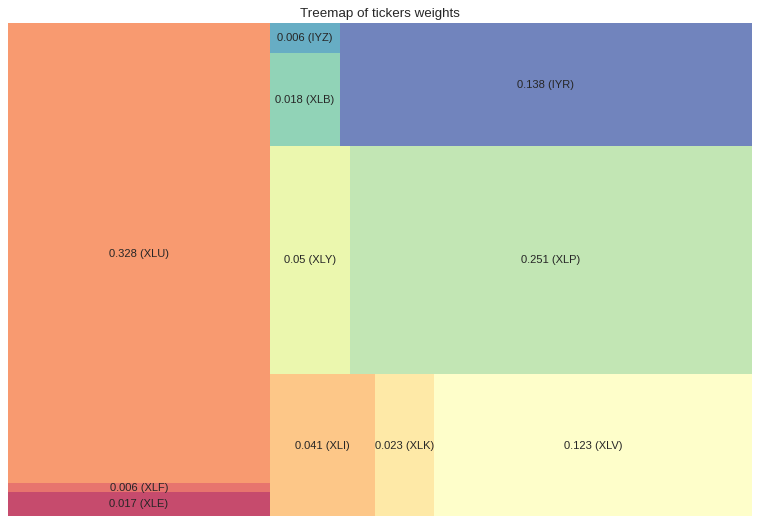


-------------------------------------------------------------------

Веса в нашем портфеле на конец периода составили: 
Energy Select Sector SPDR Fund (XLE)                    0.017
Financial Select Sector SPDR Fund (XLF)                 0.006
Utilities Select Sector SPDR Fund (XLU)                 0.328
Industrial Select Sector SPDR Fund (XLI)                0.041
Technology Select Sector SPDR Fund (XLK)                0.023
Health Care Select Sector SPDR Fund (XLV)               0.123
Consumer Discretionary Select Sector SPDR Fund (XLY)    0.050
Consumer Staples Select Sector SPDR Fund (XLP)          0.251
Materials Select Sector SPDR Fund (XLB)                 0.018
iShares U.S. Telecom ETF (IYZ)                          0.006
iShares U.S. Real Estate ETF (IYR)                      0.138
Name: 184, dtype: float64

-------------------------------------------------------------------



In [ ]:
# Prepare Data
df_weights = pd.DataFrame()
df_weights['counts'] = weights
df_weights['class'] = ['XLE', 'XLF', 'XLU', 'XLI', 'XLK', 'XLV', 'XLY', 'XLP', 'XLB', 'IYZ', 'IYR']

labels = df_weights.apply(lambda x: str(np.round(x[0], 3)) + " (" + str(x[1]) + ")", axis=1)
sizes = df_weights['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))+np.exp(-3)) for i in range(len(labels))]

# Draw Plot
mpl.rcParams.update({'font.size': 10})
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of tickers weights')
plt.axis('off')
plt.show()

print('\n-------------------------------------------------------------------')
print(f'\nВеса в нашем портфеле на конец периода составили: \n{np.round(weights, 3)}')
print('\n-------------------------------------------------------------------\n')

In [ ]:
recc = pd.read_excel('data', sheet_name='Recession', header=0)
recc = recc.iloc[1:, 1:]

В данном датасете будут представлены:


1.   Разница ежемесячных доходностей портфеля собранного по нашему алгоритму и портфеля бейзлайна.
2.   Разница ежемесячных доходностей портфеля собранного по нашему алгоритму и портфеля s&p 500.
3. Бинарная переменная рецессии, равная 1 в кризисы и 0 в обратном случае.



In [ ]:
begin = pd.DataFrame()
begin['our algorithm'] = np.array(algorithm_logs)
begin['baseline'] = np.array(base_logs)
begin['S&P 500'] = np.array(snp_logs)

begin.iloc[:, 0] = begin.iloc[:, 0]/begin.iloc[:, 0].shift(1) -1
begin.iloc[:, 1] = begin.iloc[:, 1]/begin.iloc[:, 1].shift(1) -1
begin.iloc[:, 2] = begin.iloc[:, 2]/begin.iloc[:, 2].shift(1) -1

begin = begin.iloc[1:, :]

begin.head()

,our algorithm,baseline,S&P 500
1,-1.328891,-1.328891,-1.884603
2,-0.051807,-0.051807,0.215309
3,5.753148,5.753148,2.286476
4,0.993764,0.993764,0.630100
5,-0.056659,-0.056659,-0.032147


In [ ]:
DF_t = pd.DataFrame()
DF_t['difference with baseline'] = begin.iloc[:,0] - begin.iloc[:,1]
DF_t['difference with s&p 500'] = begin.iloc[:,0] - begin.iloc[:,2]
DF_t['is recession'] = recc.iloc[1:, :].values
DF_t.head()

,difference with baseline,difference with s&p 500,is recession
1,0.0,0.555712,0
2,0.0,-0.267115,0
3,0.0,3.466672,0
4,0.0,0.363664,0
5,0.0,-0.024512,0


Построим регрессию с константой и бинарной переменной кризиса на ежемесячную разницу доходности нашего алгоритма и бэйзлайна. 

In [ ]:
X = DF_t.iloc[:, -1]
X = sm.add_constant(X)

y = DF_t.iloc[:, 0].values

model_base = sm.OLS(y, X).fit()

BG_test = acorr_breusch_godfrey(model_base, nlags = 1) 
BP_test = het_breuschpagan(model_base.resid,  model_base.model.exog)

print('Breusch-Godfrey Statistic p-value:', np.round(BG_test[1], 2))
print('Breusch-Pagan Statistic p-value:', np.round(BP_test[1], 2))

Breusch-Godfrey Statistic p-value: 0.45
Breusch-Pagan Statistic p-value: 0.0


In [ ]:
# Автокорреляция остатков есть, поэтому используем робастные стандартные ошибки (поправки Уайта)
model_robust_base = model_base.get_robustcov_results(cov_type = "HC1", use_t=None)
print(model_robust_base.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                    0.9541
Date:                Wed, 29 Mar 2023   Prob (F-statistic):              0.330
Time:                        19:26:57   Log-Likelihood:                -371.26
No. Observations:                 244   AIC:                             746.5
Df Residuals:                     242   BIC:                             753.5
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0014      0.001     -1.299   

Коэффициенты перед переменными незначимы, что означает, что ежемесячные доходности портфеля, выстроенного по нашему алгоритму и портфеля бейзлайн одинаковы. 

Построим регрессию с константой и бинарной переменной кризиса на ежемесячную разницу доходности нашего алгоритма и s&p 500.

In [ ]:
X = DF_t.iloc[:, -1]
X = sm.add_constant(X)

y = DF_t.iloc[:, 1].values

model_sp = sm.OLS(y, X).fit()

BG_test = acorr_breusch_godfrey(model_sp, nlags = 1) 

print('Breusch-Godfrey Statistic p-value:', np.round(BG_test[1], 2))

Breusch-Godfrey Statistic p-value: 0.12


In [ ]:
# Автокорреляция остатков есть, поэтому используем робастные стандартные ошибки (поправки Уайта)
model_robust_sp = model_sp.get_robustcov_results(cov_type = "HC1", use_t=None)
print(model_robust_sp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                    0.6262
Date:                Wed, 29 Mar 2023   Prob (F-statistic):              0.430
Time:                        19:27:48   Log-Likelihood:                -501.75
No. Observations:                 244   AIC:                             1008.
Df Residuals:                     242   BIC:                             1015.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0374      0.048     -0.778   

Коэффициенты перед переменными незначимы, что означает, что ежемесячные доходности портфеля, выстроенного по нашему алгоритму и портфеля S&P 500 одинаковы. 